In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
import re

import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

nltk.download('stopwords')

from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Dataset-SA.csv.zip")
df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [ ]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [ ]:
df.isnull()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
205047,False,False,False,False,False,False
205048,False,False,False,False,False,False
205049,False,False,False,False,False,False
205050,False,False,False,False,False,False


In [ ]:
# Function to preprocess text in the 'Summary' column
def preprocess_text_safe(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters, punctuation, and numbers
        text = re.sub(r'[^a-z\s]', '', text)
        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        # If the value is not a string, return an empty string
        text = ''
    return text

# Apply the preprocessing function to the 'Summary' column
df['Summary_preprocessed'] = df['Summary'].apply(preprocess_text_safe)

# Display the first few rows of the preprocessed data
print(df[['Summary', 'Summary_preprocessed']].head())


                                             Summary  \
0  great cooler excellent air flow and for this p...   
1              best budget 2 fit cooler nice cooling   
2  the quality is good but the power of air is de...   
3                  very bad product its a only a fan   
4                                      ok ok product   

                                Summary_preprocessed  
0  great cooler excellent air flow and for this p...  
1                best budget fit cooler nice cooling  
2  the quality is good but the power of air is de...  
3                  very bad product its a only a fan  
4                                      ok ok product  


In [ ]:

# Remove rows with missing values in the Sentiment column
df = df.dropna(subset=['Sentiment'])

# Convert text data to numerical using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['Summary_preprocessed'])

# Use the Sentiment column as the target variable
y = df['Sentiment']

# Encode the target variable (if it's categorical)
y = pd.factorize(y)[0]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9213869449659847

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     33421
           1       0.81      0.81      0.81      5557
           2       0.57      0.45      0.50      2033

    accuracy                           0.92     41011
   macro avg       0.78      0.74      0.76     41011
weighted avg       0.92      0.92      0.92     41011



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your dataset
csv_file_path = '/content/drive/MyDrive/Dataset-SA.csv.zip'
df = pd.read_csv(csv_file_path)

# Preprocess the Summary column
def preprocess_text_safe(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = ''
    return text

df['Summary_preprocessed'] = df['Summary'].apply(preprocess_text_safe)

# Remove rows with missing values in the Sentiment column
df = df.dropna(subset=['Sentiment'])

# Convert text data to numerical using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['Summary_preprocessed'])

# Use the Sentiment column as the target variable
y = df['Sentiment']

# Encode the target variable (if it's categorical)
y = pd.factorize(y)[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, summary_train, summary_test = train_test_split(X, y, df['Summary'], test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the probabilities for each class (positive, negative, neutral)
y_proba = clf.predict_proba(X_test)

# Create a dataframe with the Summary and predicted probabilities
df_result = pd.DataFrame({
    'Summary': summary_test,  # Original summaries from the test set
    'negative_proba': y_proba[:, 0] * 100,  # Probability of being negative
    'neutral_proba': y_proba[:, 1] * 100,   # Probability of being neutral
    'positive_proba': y_proba[:, 2] * 100   # Probability of being positive
})

# Show the resulting dataframe
print(df_result.head())

# Save the result to a CSV file if needed
# df_result.to_csv('summary_with_predictions.csv', index=False)


                                                  Summary  negative_proba  \
193551                               not working properly        0.000000   
149083                                          very good       99.443782   
194975  it is perfect if you want to work on the compu...      100.000000   
29981                                     thanks flipkart       98.901099   
137259  thanks product looks good not sure if any inst...      100.000000   

        neutral_proba  positive_proba  
193551      86.363636       13.636364  
149083       0.039730        0.516488  
194975       0.000000        0.000000  
29981        0.000000        1.098901  
137259       0.000000        0.000000  


In [ ]:
print(data.columns)

Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')


In [ ]:
data.columns = data.columns.str.strip()  # Remove leading/trailing whitespace

In [ ]:
ratings =data['Rate'].value_counts()
numbers=ratings.index
quantity=ratings.values

import plotly.express as px

figure=px.pie(data, values=quantity,names=numbers,hole=0.5)
figure.show()

In [ ]:
nltk.download('vader_lexicon')

sentiment=SentimentIntensityAnalyzer()
data['Positive']=[sentiment.polarity_scores(i)["pos"] for i in data["Summary"]]
data['Negative']=[sentiment.polarity_scores(i)["neg"] for i in data["Summary"]]
data['Neutral']=[sentiment.polarity_scores(i)["neu"] for i in data["Summary"]]

data=data[["Summary","Positive","Negative","Neutral"]]

data.head(10)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Summary,Positive,Negative,Neutral
0,great cooler excel air flow and for this price...,0.465,0.000,0.535
1,best budgetfit cooler nice cool,0.823,0.000,0.177
2,the qualiti is good but the power of air is de...,0.163,0.000,0.837
3,veri bad product it a onli a fan,0.235,0.357,0.408
4,ok ok product,0.815,0.000,0.185
5,the cooler is realli fantast and provid good a...,0.351,0.000,0.649
6,veri good product,0.592,0.000,0.408
7,veri nice,0.737,0.000,0.263
8,veri bad cooler,0.000,0.636,0.364
9,veri good,0.744,0.000,0.256


In [ ]:
# Assign sentiment labels based on Positive, Negative, and Neutral values
data['Sentiment'] = data.apply(lambda row: 1 if row['Positive'] > row['Negative'] else (-1 if row['Negative'] > row['Positive'] else 0), axis=1)

# Check unique values in the 'Sentiment' column
print(data['Sentiment'].unique())

# Convert 'Sentiment' column to binary format
data['Sentiment'] = data['Sentiment'].map({1: 1, -1: -1, 0:0})

[ 1 -1  0]


<ipython-input-12-30701354e7fd>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-30701354e7fd>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data

,Summary,Positive,Negative,Neutral,Sentiment
0,great cooler excel air flow and for this price...,0.465,0.000,0.535,1
1,best budgetfit cooler nice cool,0.823,0.000,0.177,1
2,the qualiti is good but the power of air is de...,0.163,0.000,0.837,1
3,veri bad product it a onli a fan,0.235,0.357,0.408,-1
4,ok ok product,0.815,0.000,0.185,1
...,...,...,...,...,...
205047,good product,0.744,0.000,0.256,1
205048,nice,1.000,0.000,0.000,1
205049,veri nice and fast deliveri,0.412,0.000,0.588,1
205050,awesom product,0.000,0.000,1.000,0


In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sample Dataset for Illustration
# Assuming you have a pandas dataframe `df` with a 'review_text' column for reviews and 'sentiment' column for labels

# Step 1: Data Preparation (Clean the text if not already done)
# Example of text cleaning (this can be customized based on the dataset):
data['cleaned_text'] = data['Review'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

# Step 2: Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(data['cleaned_text']).toarray()  # Features
y = data['Sentiment']  # Target (Assumed to be binary: 0 for negative, 1 for positive)

# Step 3: Split the data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Apply Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
'''
# Step 5: Make Predictions
y_pred = clf.predict(X_test)

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
'''

<ipython-input-19-c4381a3892e9>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Accuracy: 99.45%
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.93      0.96      2261
           0       1.00      1.00      1.00     19669
           1       0.99      1.00      0.99     19081

    accuracy                           0.99     41011
   macro avg       0.99      0.97      0.98     41011
weighted avg       0.99      0.99      0.99     41011

Confusion Matrix:
 [[ 2094     4   163]
 [    3 19652    14]
 [    5    38 19038]]


In [ ]:
# Step 5: Make Predictions
y_pred = clf.predict(X_test)


In [ ]:
# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.45%


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.93      0.96      2261
           0       1.00      1.00      1.00     19669
           1       0.99      1.00      0.99     19081

    accuracy                           0.99     41011
   macro avg       0.99      0.97      0.98     41011
weighted avg       0.99      0.99      0.99     41011



In [ ]:
conf_matrix=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 2094     4   163]
 [    3 19652    14]
 [    5    38 19038]]


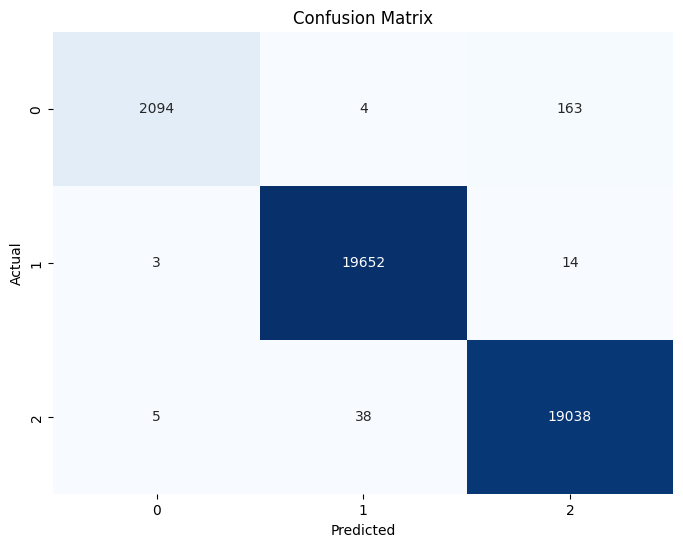

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()